In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor='white')

datadir = ''

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='schuerch',
    data_path=datadir + '/schuerch/',
    radius=60,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|███████████████████████████████████████████████████████████████████████| 140/140 [00:15<00:00,  8.80it/s]

Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 21 distinct celltypes.
Mean of mean node degree per images across images: 10.311835

 Celldata metadata: {'lateral_resolution': 0.377442, 'fn': 'CRC_clusters_neighborhoods_markers_NEW.csv', 'image_col': 'File Name', 'pos_cols': ['X:X', 'Y:Y'], 'cluster_col': 'ClusterName', 'cluster_col_preprocessed': 'ClusterName_preprocessed', 'patient_col': 'patients'}


# Cell-type centric summary statistics in CODEX - cancer dataset. 

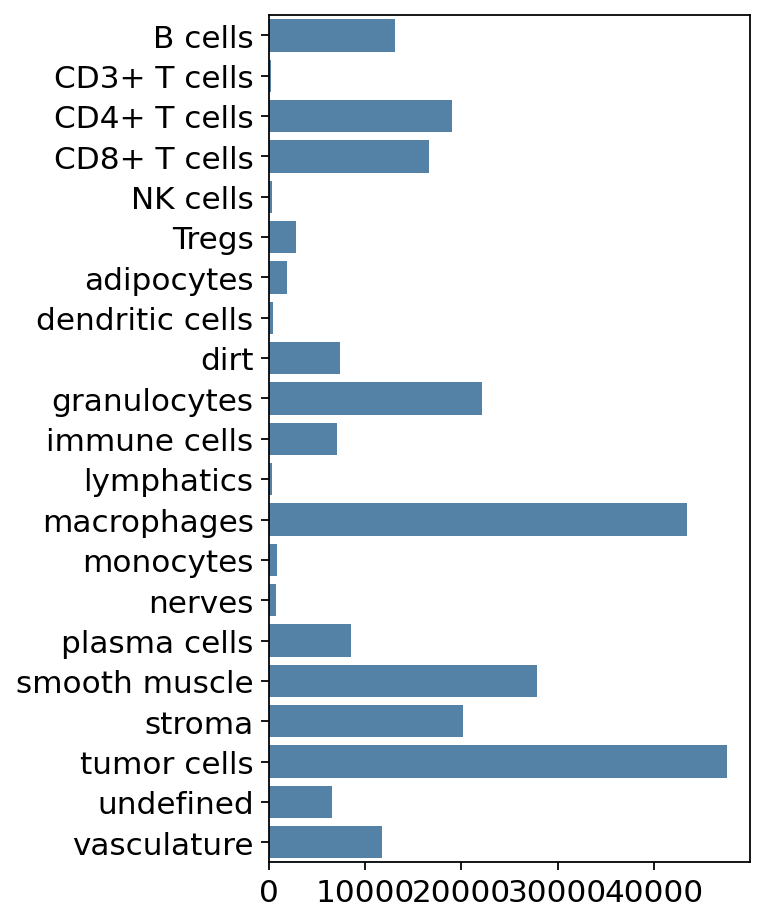

In [3]:
interpreter.data.celltype_frequencies()

0.0
2.56106902346913
3.42377817573414
8.151810911740514
40.28233341422723
154.010672671401
505.6835192555206
1845.519572674249


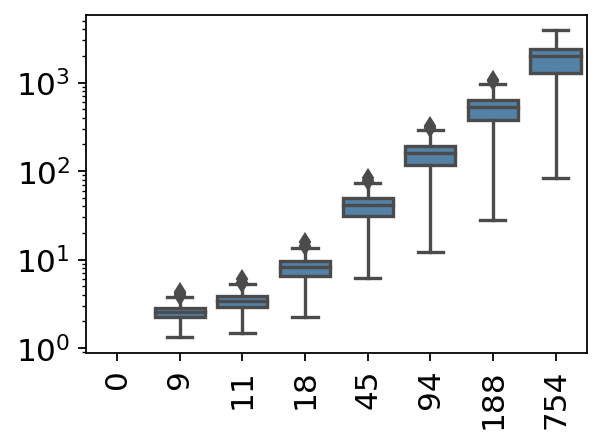

In [4]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 25, 30, 50, 120, 250, 500, 2000],
    lateral_resolution=0.377442,
)

# Variance decomposition in CODEX - cancer dataset.

100%|███████████████████████████████████████████████████████████████████████| 140/140 [02:14<00:00,  1.04it/s]


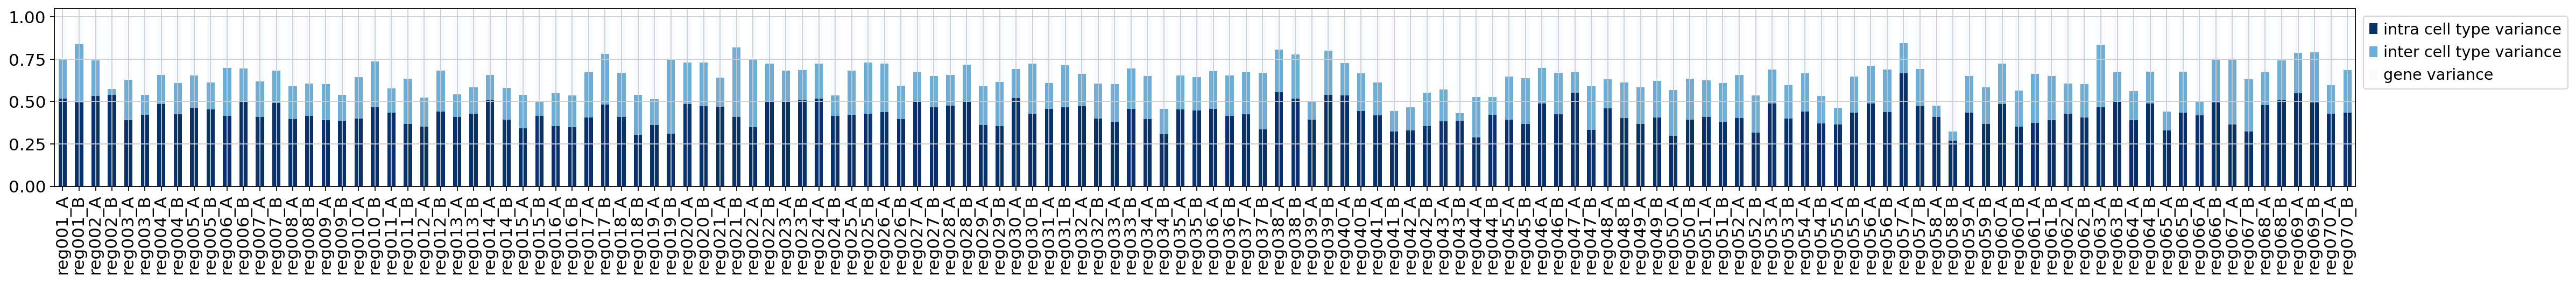

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='undefined')
interpreter.data.variance_decomposition(
    var_decomp, 
    figsize=(30, 3.5),
)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.426698
inter cell type variance    0.212483
gene variance               0.360819
dtype: float32

# Normalised contact frequencies of cell-types in spatial neighborhoods.

100%|██████████████████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 126.05it/s]


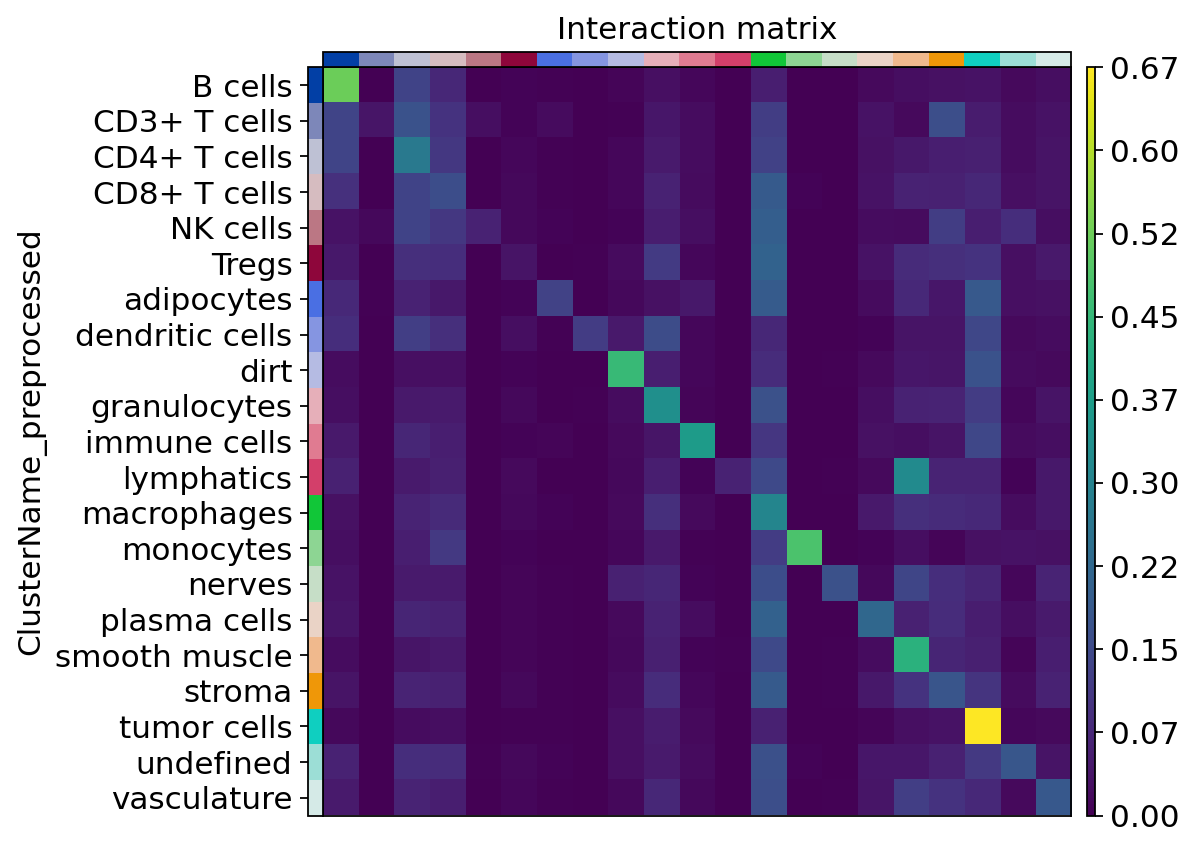

In [7]:
interpreter.data.celldata_interaction_matrix()

# Ligand–receptor permutation test. 

n cells: 25226


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 132.14permutation/s]


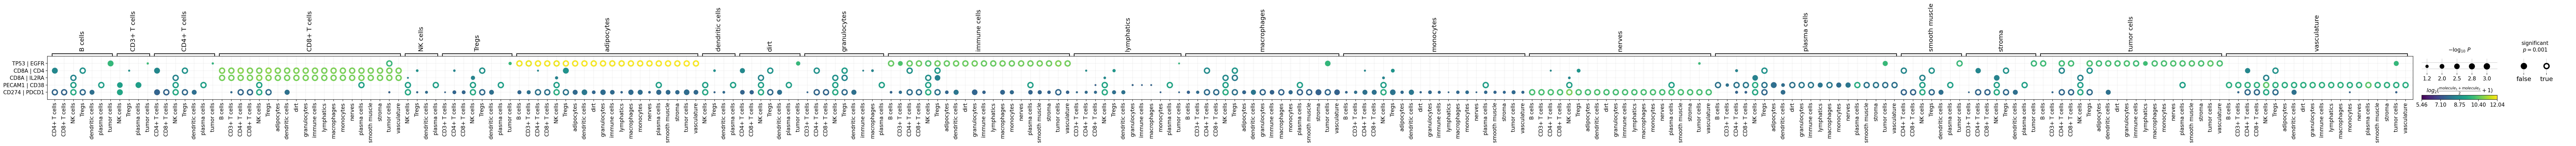

In [8]:
adata = interpreter.data.ligrec(
    undefined_type='undefined',
    fraction=0.1,
)

In [9]:
adata.uns['ClusterName_preprocessed_ligrec']['metadata'].to_csv("../cellphoneDB/codex_cancer_cellphoneDB.csv")

# Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

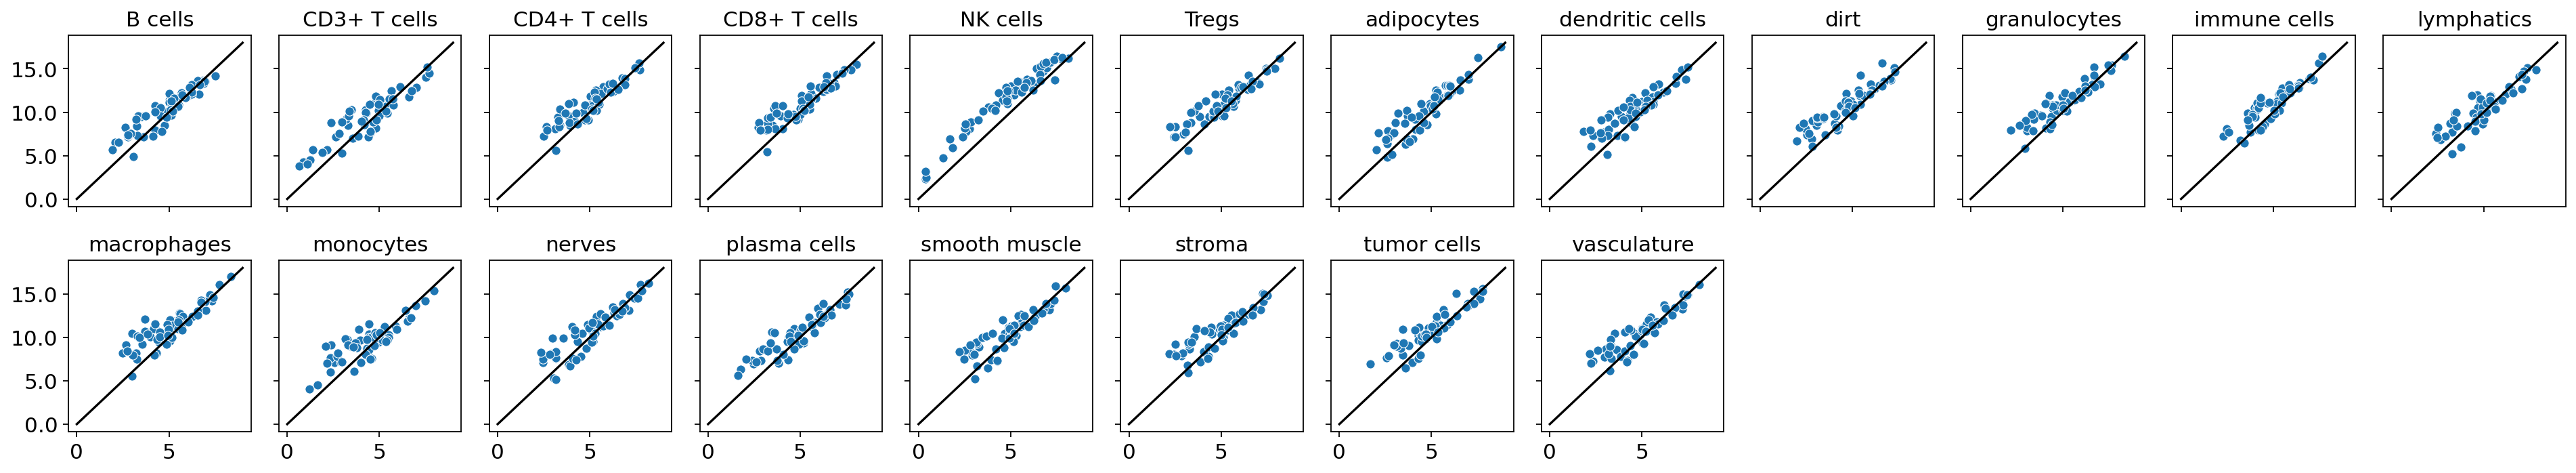

In [10]:
interpreter.data.noise_structure(
    undefined_type='undefined',
    min_x=0.0, max_x=9., 
)